In [1]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

sns.set(
    'paper', font_scale=2.0,
        rc={'lines.linewidth': 2,
            'text.usetex' : True,
            'image.interpolation': 'nearest',
            'image.cmap': 'gray',
            'figure.figsize': (10.0, 8.0),
            'legend.frameon': True,
            'legend.fancybox': True,
            }
       )
sns.set_style('whitegrid', {'axes.grid' : False})
sns.set_palette(sns.color_palette("Paired",10), 10, color_codes=False)

In [3]:
res = torch.load('resbbox.pth')
p = res.eval['params']

In [4]:
T = len(p.iouThrs)
R = len(p.recThrs)
K = len(p.catIds) if p.useCats else 1
A = len(p.areaRng)
M = len(p.maxDets)

In [5]:
prec = res.eval['precision']
rec = res.eval['recall']

print(prec.shape)
print(rec.shape)

(10, 101, 1, 4, 3)
(10, 1, 4, 3)


In [6]:
res.eval['params'].maxDets

[1, 10, 100]

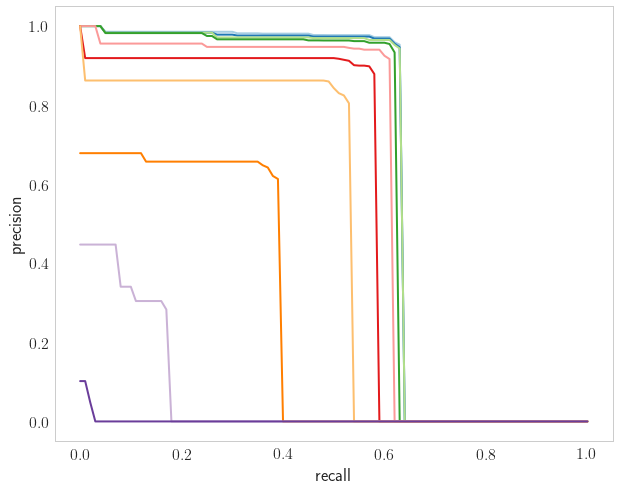

In [7]:
idx = range(0,10)
for i in idx:
    plt.plot(p.recThrs, prec[i,:,0,0,-1])
# plt.legend([f'{iou:.2f}' for iou in p.iouThrs[idx]], 
#            title='IoU', 
#            fancybox = True,
#            loc='center left', 
#            bbox_to_anchor=(1., .5),
#            shadow=True,
#           )

plt.ylabel('precision')
plt.xlabel('recall')
plt.savefig('pr_curve.pdf',bbox_inches='tight')
plt.show()

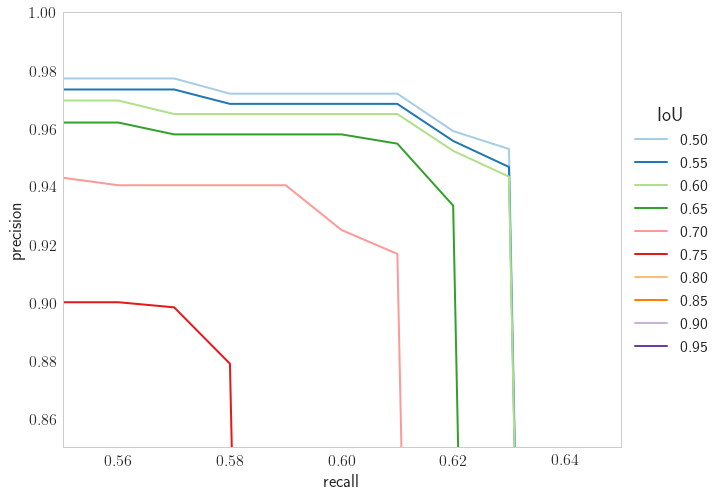

In [8]:
idx = range(0,10)
for i in idx:
    plt.plot(p.recThrs, prec[i,:,0,0,-1])
plt.legend([f'{iou:.2f}' for iou in p.iouThrs[idx]], 
           title='IoU', 
           fancybox = True,
           loc='center left', 
           bbox_to_anchor=(1., .5),
           shadow=True,
          )
plt.ylabel('precision')
plt.xlabel('recall')
plt.ylim([0.85, 1.0])
plt.xlim([0.55, 0.65])
plt.savefig('pr_curve_zoom.pdf',bbox_inches='tight')
plt.show()